In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
tony_db_2021 = pd.read_csv(r'\\192.168.88.18\oddtech\AIDAILER\byjoinmethod_tony_db2021pluscdr2021.csv', index_col = False)


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
tony_db_2021.head(3)

,Unnamed: 0,FullPhoneNumber,cityname,state,ZipCode,personexactage,IsMobile,estimatedincomecode,CreditRating,NumberOfLinesOfCredit,Credit_RangeOfNewCredit,homeownerprobabilitymodel,Disconnected,National DNC,Internal DNC,Litigator,datetime,duration,day,responsive
0,0,8085360276,Honolulu,HI,96817,61.0,0,M,A,-1.0,-1.0,1.0,0,0,0,0,2021-08-26 20:40:04,0,Thursday,0
1,1,8086769544,Honolulu,HI,96818,55.0,0,O,D,-1.0,-1.0,1.0,0,0,0,0,2021-08-25 20:59:26,0,Wednesday,0
2,2,8084974246,Honolulu,HI,96818,64.0,1,M,F,-1.0,-1.0,1.0,0,0,0,0,2021-08-27 17:48:00,0,Friday,0


In [5]:
fortrainData = tony_db_2021[['state','personexactage','IsMobile','estimatedincomecode' ,'day', 'duration', 'datetime']]
fortrainData['state'][15]

'HI'

In [6]:
fortrainData

,state,personexactage,IsMobile,estimatedincomecode,day,duration,datetime
0,HI,61.0,0,M,Thursday,0,2021-08-26 20:40:04
1,HI,55.0,0,O,Wednesday,0,2021-08-25 20:59:26
2,HI,64.0,1,M,Friday,0,2021-08-27 17:48:00
3,HI,74.0,0,N,Friday,277,2021-08-27 15:47:52
4,HI,74.0,0,N,Tuesday,0,2021-08-24 18:25:34
...,...,...,...,...,...,...,...
1228272,WY,63.0,0,F,Tuesday,0,2021-08-17 17:18:14
1228273,WY,63.0,0,F,Monday,0,2021-04-19 17:50:39
1228274,WY,63.0,0,F,Monday,21,2021-04-12 17:18:05
1228275,WY,63.0,0,F,Thursday,20,2021-04-01 22:57:05


In [7]:
df = fortrainData.copy()
df['DateTime'] = pd.to_datetime(df['datetime'])
df['date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
df['time'] = df['DateTime'].dt.strftime('%H:%M')
df

,state,personexactage,IsMobile,estimatedincomecode,day,duration,datetime,DateTime,date,time
0,HI,61.0,0,M,Thursday,0,2021-08-26 20:40:04,2021-08-26 20:40:04,26/08/2021,20:40
1,HI,55.0,0,O,Wednesday,0,2021-08-25 20:59:26,2021-08-25 20:59:26,25/08/2021,20:59
2,HI,64.0,1,M,Friday,0,2021-08-27 17:48:00,2021-08-27 17:48:00,27/08/2021,17:48
3,HI,74.0,0,N,Friday,277,2021-08-27 15:47:52,2021-08-27 15:47:52,27/08/2021,15:47
4,HI,74.0,0,N,Tuesday,0,2021-08-24 18:25:34,2021-08-24 18:25:34,24/08/2021,18:25
...,...,...,...,...,...,...,...,...,...,...
1228272,WY,63.0,0,F,Tuesday,0,2021-08-17 17:18:14,2021-08-17 17:18:14,17/08/2021,17:18
1228273,WY,63.0,0,F,Monday,0,2021-04-19 17:50:39,2021-04-19 17:50:39,19/04/2021,17:50
1228274,WY,63.0,0,F,Monday,21,2021-04-12 17:18:05,2021-04-12 17:18:05,12/04/2021,17:18
1228275,WY,63.0,0,F,Thursday,20,2021-04-01 22:57:05,2021-04-01 22:57:05,01/04/2021,22:57


In [9]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 19 11:44:02 2021

@author: ashba
"""

import us
import pytz
from datetime import datetime


def getlocaltime(time_zones,dt ):
    try: 
        dt = datetime.strptime(dt, '%H:%M')
        return pytz.timezone(time_zones).fromutc(dt)
    except:
        print (dt)
        
        
        
df['time_zones'] = df.apply(lambda row:us.states.lookup(row.state).time_zones[0], axis=1)
df['localtime'] = df.apply(  lambda row: getlocaltime(row.time_zones, row.time) , axis=1)

In [18]:
df['date'].head(10)

0    26/08/2021
1    25/08/2021
2    27/08/2021
3    27/08/2021
4    24/08/2021
5    26/08/2021
6    24/08/2021
7    27/08/2021
8    16/08/2021
9    24/08/2021
Name: date, dtype: object

In [19]:
df['Local_time'] = pd.to_datetime(df['localtime'], utc=True)
df['seperated_time'] = df['Local_time'].dt.strftime('%H:%M')
df['seperated_time']


0          20:40
1          20:59
2          17:48
3          15:47
4          18:25
           ...  
1228272    17:18
1228273    17:50
1228274    17:18
1228275    22:57
1228276    17:03
Name: seperated_time, Length: 1228277, dtype: object

In [20]:
df

,state,personexactage,IsMobile,estimatedincomecode,day,duration,datetime,DateTime,date,time,time_zones,localtime,Local_time,seperated_time
0,HI,61.0,0,M,Thursday,0,2021-08-26 20:40:04,2021-08-26 20:40:04,26/08/2021,20:40,Pacific/Honolulu,1900-01-01 10:09:00-10:31,1900-01-01 20:40:00+00:00,20:40
1,HI,55.0,0,O,Wednesday,0,2021-08-25 20:59:26,2021-08-25 20:59:26,25/08/2021,20:59,Pacific/Honolulu,1900-01-01 10:28:00-10:31,1900-01-01 20:59:00+00:00,20:59
2,HI,64.0,1,M,Friday,0,2021-08-27 17:48:00,2021-08-27 17:48:00,27/08/2021,17:48,Pacific/Honolulu,1900-01-01 07:17:00-10:31,1900-01-01 17:48:00+00:00,17:48
3,HI,74.0,0,N,Friday,277,2021-08-27 15:47:52,2021-08-27 15:47:52,27/08/2021,15:47,Pacific/Honolulu,1900-01-01 05:16:00-10:31,1900-01-01 15:47:00+00:00,15:47
4,HI,74.0,0,N,Tuesday,0,2021-08-24 18:25:34,2021-08-24 18:25:34,24/08/2021,18:25,Pacific/Honolulu,1900-01-01 07:54:00-10:31,1900-01-01 18:25:00+00:00,18:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228272,WY,63.0,0,F,Tuesday,0,2021-08-17 17:18:14,2021-08-17 17:18:14,17/08/2021,17:18,America/Denver,1900-01-01 10:18:00-07:00,1900-01-01 17:18:00+00:00,17:18
1228273,WY,63.0,0,F,Monday,0,2021-04-19 17:50:39,2021-04-19 17:50:39,19/04/2021,17:50,America/Denver,1900-01-01 10:50:00-07:00,1900-01-01 17:50:00+00:00,17:50
1228274,WY,63.0,0,F,Monday,21,2021-04-12 17:18:05,2021-04-12 17:18:05,12/04/2021,17:18,America/Denver,1900-01-01 10:18:00-07:00,1900-01-01 17:18:00+00:00,17:18
1228275,WY,63.0,0,F,Thursday,20,2021-04-01 22:57:05,2021-04-01 22:57:05,01/04/2021,22:57,America/Denver,1900-01-01 15:57:00-07:00,1900-01-01 22:57:00+00:00,22:57


In [21]:
df['localtime'].head()

0    1900-01-01 10:09:00-10:31
1    1900-01-01 10:28:00-10:31
2    1900-01-01 07:17:00-10:31
3    1900-01-01 05:16:00-10:31
4    1900-01-01 07:54:00-10:31
Name: localtime, dtype: object

In [22]:
df['time_zones'].head()

0    Pacific/Honolulu
1    Pacific/Honolulu
2    Pacific/Honolulu
3    Pacific/Honolulu
4    Pacific/Honolulu
Name: time_zones, dtype: object

In [23]:
len(fortrainData.isnull())

1228277

In [24]:
len(fortrainData.notnull())

1228277

# Finding Length unknown values of all columns

In [9]:
fortrainData[fortrainData['estimatedincomecode']== 'U']
fortrainData[fortrainData['IsMobile']== 'U']
fortrainData[fortrainData['personexactage']== 'U']
fortrainData[fortrainData['state']== 'U']
#fortrainData[fortrainData['FullPhoneNumber']== 'U']
# fortrainData[fortrainData['datetime	']== 'U']
fortrainData[fortrainData['day']== 'U']
fortrainData[fortrainData['duration']== 'U']

,state,personexactage,IsMobile,estimatedincomecode,day,duration


In [10]:
fortrainData = fortrainData[fortrainData['estimatedincomecode'] != 'U']
fortrainData = fortrainData[fortrainData['duration'] != 'U']

In [11]:
fortrainData['personexactage'] = fortrainData['personexactage'].astype(int)

In [12]:
fortrainData

,state,personexactage,IsMobile,estimatedincomecode,day,duration
0,HI,61,0,M,Thursday,0
1,HI,55,0,O,Wednesday,0
2,HI,64,1,M,Friday,0
3,HI,74,0,N,Friday,277
4,HI,74,0,N,Tuesday,0
...,...,...,...,...,...,...
1228272,WY,63,0,F,Tuesday,0
1228273,WY,63,0,F,Monday,0
1228274,WY,63,0,F,Monday,21
1228275,WY,63,0,F,Thursday,20


<AxesSubplot:xlabel='personexactage', ylabel='duration'>

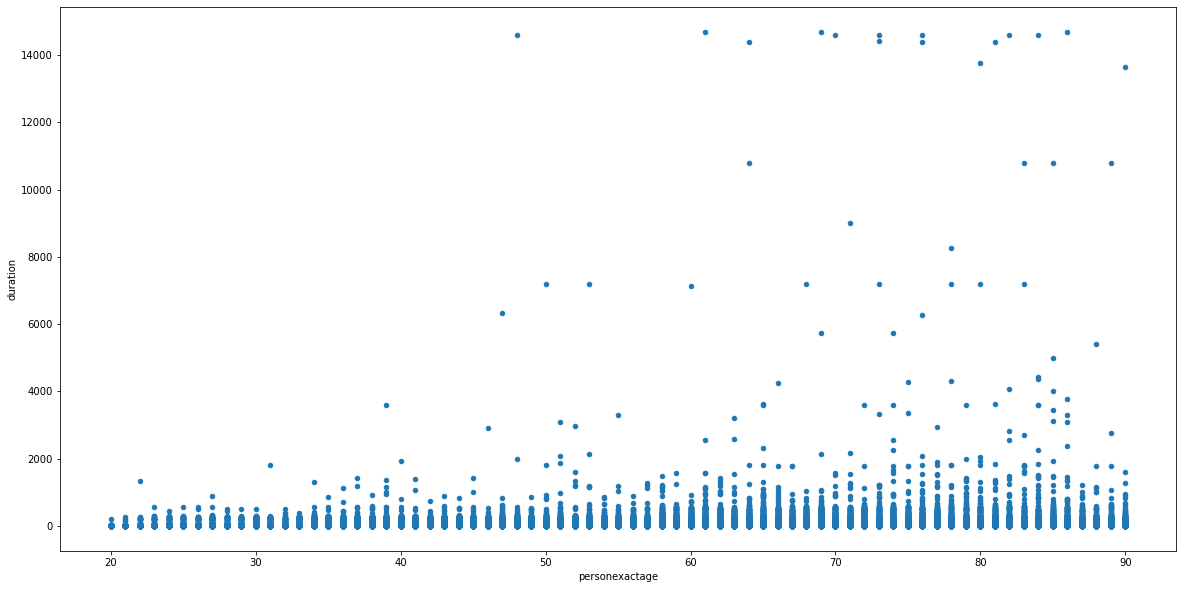

In [13]:
fortrainData.plot.scatter('personexactage', 'duration', figsize = (20,10))

# Encoding State

In [14]:
print(fortrainData.groupby('state').size())
print(len(fortrainData.groupby('state')))
print(set(fortrainData['state']))

state
AK       347
AL    106803
AR     33284
AZ     47709
CO     43609
CT     64944
DC     11402
DE     15506
HI       381
IA     56757
ID     22016
KS     33475
KY     59665
ME     22163
MN     37748
MO     84111
MS     41072
MT     17607
ND      8322
NE     20167
NH     17128
NM     19020
NV     31510
OK     37069
OR     42186
RI     19726
SC     57622
SD      8365
TN     76462
UT     28847
WA     54034
WI     73930
WV     25077
WY      5488
dtype: int64
34
{'NH', 'AR', 'DE', 'WV', 'NE', 'ID', 'NM', 'MT', 'SC', 'UT', 'SD', 'AL', 'KY', 'RI', 'AZ', 'IA', 'CT', 'WI', 'MS', 'MN', 'CO', 'OK', 'ME', 'AK', 'KS', 'OR', 'NV', 'ND', 'MO', 'TN', 'WA', 'HI', 'WY', 'DC'}


### Indexing

In [15]:
fortrainData['state'].replace(to_replace = set(fortrainData['state']), value = np.arange(0,34), inplace = True)
fortrainData.groupby('state').size()


state
0      17128
1      33284
2      15506
3      25077
4      20167
5      22016
6      19020
7      17607
8      57622
9      28847
10      8365
11    106803
12     59665
13     19726
14     47709
15     56757
16     64944
17     73930
18     41072
19     37748
20     43609
21     37069
22     22163
23       347
24     33475
25     42186
26     31510
27      8322
28     84111
29     76462
30     54034
31       381
32      5488
33     11402
dtype: int64

### One-hot encoding state column

In [17]:
from tensorflow.keras.utils import to_categorical
state_encoded_data = to_categorical(fortrainData['state'])
state_encoded_data


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Encoding Income Data

In [18]:
print(fortrainData.groupby('estimatedincomecode').size())
print(len(fortrainData.groupby('estimatedincomecode')))
print(set(fortrainData['estimatedincomecode']))

estimatedincomecode
A     41257
B    139621
C     54703
D     30354
E     74349
F     32080
G     66151
H     35715
I     68935
J     41435
K     73067
L     49496
M     92943
N    185469
O    145576
P     19019
Q     26774
R     21629
S     24979
dtype: int64
19
{'E', 'R', 'S', 'B', 'A', 'F', 'C', 'K', 'D', 'G', 'Q', 'J', 'O', 'L', 'P', 'M', 'H', 'I', 'N'}


### Indexing Income data

In [19]:
fortrainData['estimatedincomecode'].replace(to_replace = set(fortrainData['estimatedincomecode']), value = np.arange(0,19), inplace = True)
fortrainData.groupby('estimatedincomecode').size()

estimatedincomecode
0      74349
1      21629
2      24979
3     139621
4      41257
5      32080
6      54703
7      73067
8      30354
9      66151
10     26774
11     41435
12    145576
13     49496
14     19019
15     92943
16     35715
17     68935
18    185469
dtype: int64

### One-hot encoding income column

In [20]:
from tensorflow.keras.utils import to_categorical
income_encoded_data = to_categorical(fortrainData['estimatedincomecode'])
income_encoded_data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Encoding Day Data

In [21]:
print(fortrainData.groupby('day').size())
print(len(fortrainData.groupby('day')))
print(set(fortrainData['day']))

day
Friday       233027
Monday       315966
Saturday      47914
Thursday     243315
Tuesday      221009
Wednesday    162321
dtype: int64
6
{'Thursday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Friday'}



### Indexing day data

In [22]:
fortrainData['day'].replace(to_replace = set(fortrainData['day']), value = np.arange(0,6), inplace = True)
fortrainData.groupby('day').size()

day
0    243315
1     47914
2    315966
3    221009
4    162321
5    233027
dtype: int64

### One-hot encoding day column

In [23]:
day_encoded_data = to_categorical(fortrainData['day'])
day_encoded_data

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [24]:
print(len(state_encoded_data))
print(len(income_encoded_data))
print(len(day_encoded_data))
print(len(fortrainData['personexactage']))
print(len(fortrainData['IsMobile']))


1223552
1223552
1223552
1223552
1223552


In [26]:
# day_encoded_data_str_list = []

# for i in range(len(day_encoded_data_str)):
# #     day_encoded_data_str[i] = str(day_encoded_data_str[i])
#     day_encoded_data_str_list.append(str(day_encoded_data_str[i]))

In [27]:
# day_encoded_data_str_list

In [28]:
# day_encoded_data_str

In [29]:
# fortrainData['Day_Encoded_Data'] = day_encoded_data_str

In [30]:
# fortrainData

In [31]:
# fortrainData.loc[:,'state_encoded_data'] = state_encoded_data

In [33]:
# for i in day_encoded_data:
#     print(i)

In [ ]:
fortrainData['day']

In [34]:
print(len(state_encoded_data))
print(len(income_encoded_data))
print(len(day_encoded_data))


1223552
1223552
1223552


In [35]:
type(state_encoded_data)

numpy.ndarray

In [37]:
# for i in state_encoded_data:
#     df = pd.DataFrame(columns = ['Column_A'], data = i)


In [ ]:
oh_column = fortrainData['day']

In [ ]:
oh_df = fortrainData

In [ ]:
days_enocindg= {
0 : [1,0,0,0,0,0],
    1 : [0, 1,0,0,0,0],
        2 : [0,0,1,0,0,0],
            3 : [0,0,0,1,0,0],
                4 : [0,0,0,0,1,0],
                    5 : [0,0,0,0,0,1]
}



In [ ]:
{0 : [1,0,0,0,0,0], 1 : [0, 1,0,0,0,0], 2 : [0,0,1,0,0,0], 3 : [0,0,0,1,0,0], 4 : [0,0,0,0,1,0], 5 : [0,0,0,0,0,1]}

In [ ]:
oh_column[0]

In [ ]:
# for i in range(len(oh_column)):
#     print(oh_column[i])

In [ ]:
# oh_df

for i in range(len(oh_column)):
    print(oh_column[i])

In [ ]:
oh_column_df = pd.DataFrame(oh_column)

In [ ]:
type(oh_column)

In [ ]:
type(oh_column_df)

In [ ]:
# oh_column_df

In [ ]:
# # oh_df['day'].replace(days_enocindg, inplace=True)

# oh_df['day'].replace({0 : [1,0,0,0,0,0], 1 : [0, 1,0,0,0,0], 2 : [0,0,1,0,0,0], 3 : [0,0,0,1,0,0], 4 : [0,0,0,0,1,0], 5 : [0,0,0,0,0,1]})

In [ ]:
# oh_df['day'].unique()

In [ ]:
# days_enocindg= {
# 0 : [1,0,0,0,0,0],
#     1 : [0, 1,0,0,0,0],
#         2 : [0,0,1,0,0,0],
#             3 : [0,0,0,1,0,0],
#                 4 : [0,0,0,0,1,0],
#                     5 : [0,0,0,0,0,1]
# }
# for i,j in days_enocindg.items():
#     for j in fortrainData['day']:
#         if i == j:
#             print(i)


In [ ]:
# df = fortrainData.copy()
# df['newday'] = df['day'].replace(days_enocindg)
# df

In [ ]:
# for i, j in days_enocindg.items():
#     print(i)
# #     for d in fortrainData['day']:
# #         #print(d)
# #         if i == d:
# #             print(j)

# Seperating Data for Training

In [38]:
train_data =  fortrainData[['personexactage', 'IsMobile']]
train_data


,personexactage,IsMobile
0,61,0
1,55,0
2,64,1
3,74,0
4,74,0
...,...,...
1228272,63,0
1228273,63,0
1228274,63,0
1228275,63,0


In [39]:
lables = fortrainData['duration']
lables

0            0
1            0
2            0
3          277
4            0
          ... 
1228272      0
1228273      0
1228274     21
1228275     20
1228276      0
Name: duration, Length: 1223552, dtype: int64

# Spliting Data

In [40]:
from sklearn.model_selection import train_test_split

# Seperating Data "sklearn" buildin Model
X = train_data  
# Seperating label column
y = fortrainData['duration']

# Spliting Data into two type(train, test)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)
print('Train Data',train_X,'\n Lenght of train Data', len(train_X))
print('Test Data',test_X,'\n Lenght of Test Data', len(test_X))

Train Data          personexactage  IsMobile
743254               54         0
40455                54         1
1097773              80         0
1226347              67         1
1131754              69         0
...                 ...       ...
361023               41         1
152796               68         0
967057               82         1
118308               69         1
306840               87         0

[917664 rows x 2 columns] 
 Lenght of train Data 917664
Test Data          personexactage  IsMobile
126876               60         1
1163197              82         0
390985               52         1
857330               50         1
108431               70         1
...                 ...       ...
793413               70         1
1161681              82         0
938160               78         1
377433               87         0
896150               37         1

[305888 rows x 2 columns] 
 Lenght of Test Data 305888


In [41]:
train_X.shape

(917664, 2)

In [42]:
test_X.shape

(305888, 2)

In [43]:
305888 +917664 

1223552

In [44]:
X.shape

(1223552, 2)

# Training Model

In [45]:
from sklearn.linear_model import LinearRegression

# Using Regression Model
regression = LinearRegression()
regression.fit(train_X, train_y)
print('Model Trained')


Model Trained


# Predicting Test Data

In [46]:
pred_test_data = regression.predict(test_X)

In [47]:
len(test_y)
test_y

126876      0
1163197    28
390985      8
857330      0
108431      0
           ..
793413      0
1161681     0
938160     11
377433      0
896150      0
Name: duration, Length: 305888, dtype: int64

In [48]:
len(pred_test_data)

305888

# Gathering Results

In [49]:
PredictDataFrame = pd.DataFrame(test_X)
PredictDataFrame

,personexactage,IsMobile
126876,60,1
1163197,82,0
390985,52,1
857330,50,1
108431,70,1
...,...,...
793413,70,1
1161681,82,0
938160,78,1
377433,87,0


In [50]:
PredictDataFrame['Actural Duration'] = test_y


In [51]:
PredictDataFrame

,personexactage,IsMobile,Actural Duration
126876,60,1,0
1163197,82,0,28
390985,52,1,8
857330,50,1,0
108431,70,1,0
...,...,...,...
793413,70,1,0
1161681,82,0,0
938160,78,1,11
377433,87,0,0


In [52]:
PredictDataFrame['Predicted Duration'] = pred_test_data

In [53]:
PredictDataFrame.head(10)

,personexactage,IsMobile,Actural Duration,Predicted Duration
126876,60,1,0,14.047771
1163197,82,0,28,18.506239
390985,52,1,8,13.797626
857330,50,1,0,13.735090
108431,70,1,0,14.360452
93318,85,1,0,14.829474
437948,72,1,0,14.422988
1134826,52,1,9,13.797626
688335,46,1,0,13.610017
151700,27,1,9,13.015923


In [54]:
PredictDataFrame[PredictDataFrame['personexactage'] == 27]

,personexactage,IsMobile,Actural Duration,Predicted Duration
151700,27,1,9,13.015923
808966,27,0,11,16.786492
553131,27,0,0,16.786492
327768,27,0,22,16.786492
1045522,27,0,0,16.786492
...,...,...,...,...
1201369,27,0,0,16.786492
651657,27,1,13,13.015923
1030130,27,1,0,13.015923
654484,27,1,14,13.015923


# Plottting Results

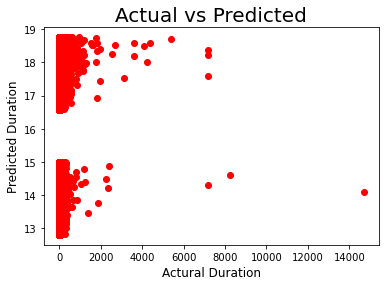

(None,)

In [55]:
import matplotlib.pyplot as plt 
plt.scatter(x=PredictDataFrame['Actural Duration'], y=PredictDataFrame['Predicted Duration'], c='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Predicted Duration', size=12)
plt.xlabel('Actural Duration', size=12)
plt.show(),

# Predicting With new Dataset

In [56]:
age = 27
ismobile = 1
result = regression.predict([[age, ismobile]])
print("Score = {}".format(round(result[0],3)))

Score = 13.016


In [57]:
pdf = PredictDataFrame.copy()
pdf['Predicted Duration'].astype(int)

126876     14
1163197    18
390985     13
857330     13
108431     14
           ..
793413     14
1161681    18
938160     14
377433     18
896150     13
Name: Predicted Duration, Length: 305888, dtype: int32

In [58]:
pdf['Predicted Duration'].astype(int)

126876     14
1163197    18
390985     13
857330     13
108431     14
           ..
793413     14
1161681    18
938160     14
377433     18
896150     13
Name: Predicted Duration, Length: 305888, dtype: int32

<AxesSubplot:xlabel='Actural Duration', ylabel='Predicted Duration'>

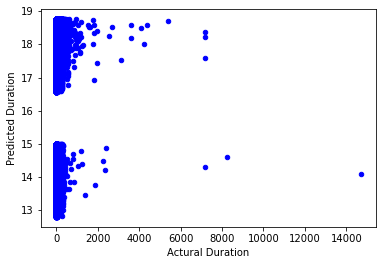

In [59]:
PredictDataFrame.plot.scatter(x='Actural Duration',
               y='Predicted Duration',
                c='blue',
                colormap='viridis')

In [60]:
pdf.head(2)

,personexactage,IsMobile,Actural Duration,Predicted Duration
126876,60,1,0,14.047771
1163197,82,0,28,18.506239


In [61]:
min(pdf['Predicted Duration'].to_list()), max(pdf['Predicted Duration'].to_list())

(12.797045678882458, 18.756384165347608)

In [62]:
min(pdf['Actural Duration'].to_list()), max(pdf['Actural Duration'].to_list())

(0, 14683)

In [63]:
def convert(n):
    if n in range(0, 5):
        n = 'D1'
    if n in range(10,60):
        n = 'D2'
    if n == 60:
        n = str(n)
        n = 'D3'
pdf['Actual'] = pdf['Actural Duration'].apply(convert)
pdf['Predicted'] = pdf['Predicted Duration'].apply(convert)



from sklearn.metrics import *
confusion_matrix(pdf['Actual'].to_list() ,pdf['Predicted'].to_list())

ValueError: unknown is not supported

In [64]:
pdf['Actual'] 

126876     None
1163197    None
390985     None
857330     None
108431     None
           ... 
793413     None
1161681    None
938160     None
377433     None
896150     None
Name: Actual, Length: 305888, dtype: object

In [65]:
pdf['Predicted']

126876     None
1163197    None
390985     None
857330     None
108431     None
           ... 
793413     None
1161681    None
938160     None
377433     None
896150     None
Name: Predicted, Length: 305888, dtype: object